In [36]:
%matplotlib inline

import matplotlib.pyplot as plt 
import numpy as np
from dataclasses import dataclass
from tqdm import tqdm
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
import utils
import random

In [37]:
delta = 0.1
r1 = 1.0
r2 = 10.0
k = 3.0
eta_l = k * (delta/r1)
eta_s = k * (delta/r2)

#setups
config = utils.config()
config.init = 100.0
config.iter_num = 1000
config.sample_num = 500
config.lr_large = eta_l
config.lr_small = eta_s
#以下で関数の形状を調整する
config.p = 1.0
config.delta = delta
config.r1 = r1
config.r2 = r2

config

config(init=100.0, iter_num=1000, sample_num=500, lr_large=0.30000000000000004, lr_small=0.03, p=1.0, delta=0.1, r1=1.0, r2=10.0)

/var/folders/42/_8jtb5594rddnjmwctnf_xzm0000gn/T/ipykernel_30606/2862928837.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


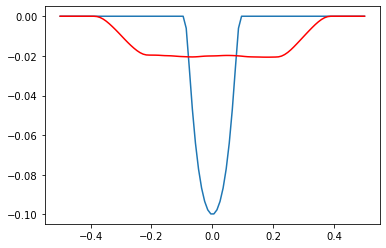

In [38]:
x = np.linspace(-0.5, 0.5, 100)

def smoothed_g1(v, conf):
    delta = conf.delta
    r = conf.r1
    w = 0
    num=10000
    for i in range(num):
        noise = np.random.uniform(-r, r)
        w += utils.g(v + conf.lr_large*noise, conf)/num 
    return w

def smoothed_g2(v, conf):
    delta = conf.delta
    r = conf.r2
    w = 0
    num=10000
    for i in range(num):
        noise = np.random.uniform(-r, r)
        w += utils.g(v + conf.lr_small*noise, conf)/num 
    return w

z1 = utils.g(x, config)
z2 = smoothed_g1(x, config)
z3 = smoothed_g2(x, config)

fig, ax = plt.subplots() 
ax.plot(x, z1)
ax.plot(x, z2, color='r')
#ax.plot(x, z3, color='g')
#plt.xlim(4,6)
fig.show()

/var/folders/42/_8jtb5594rddnjmwctnf_xzm0000gn/T/ipykernel_30606/2721715328.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


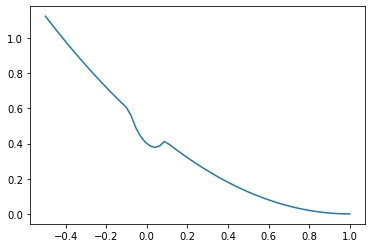

In [39]:
x = np.linspace(-0.5, 1, 65)
z1 = utils.f(x, config)

fig, ax = plt.subplots() 
ax.plot(x, z1)
#plt.xlim(-6,0)
fig.show()

/var/folders/42/_8jtb5594rddnjmwctnf_xzm0000gn/T/ipykernel_30606/1014705954.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


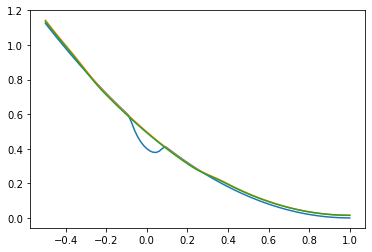

In [40]:
'''
def smoothed_f(v, conf):
    f = utils.f
    delta = conf.delta
    k = conf.k
    v1 = v + eta*k*delta
    v2 = v - eta*k*delta
    return (f(v1, conf)+f(v2, conf))/2
'''

def smoothed_f1(v, conf):
    f = utils.f
    delta = conf.delta
    r = conf.r1
    w = 0
    num=10000
    for i in range(num):
        noise = np.random.uniform(-r, r)
        w += f(v + conf.lr_large*noise, conf)/num 
    return w

def smoothed_f2(v, conf):
    f = utils.f
    delta = conf.delta
    r = conf.r2
    w = 0
    num=10000
    for i in range(num):
        noise = np.random.uniform(-r, r)
        w += f(v + conf.lr_small*noise, conf)/num 
    return w
    
x = np.linspace(-0.5, 1, 100)
z1 = utils.f(x, config)
z2 = smoothed_f1(x, config)
z3 = smoothed_f2(x, config)

fig, ax = plt.subplots() 
ax.plot(x, z1)
ax.plot(x, z2)
ax.plot(x, z3)
fig.show()

In [41]:
sgd_l = utils.optimize(config, 'SGD_large')
sgd_s = utils.optimize(config, 'SGD_small')

ave_sgd_l = utils.optimize(config, 'Ave_SGD_large')
ave_sgd_s = utils.optimize(config, 'Ave_SGD_small')

#gd_l = utils.optimize(config, 'GD_large')
#gd_s = utils.optimize(config, 'GD_small')

100%|█████████████████████████████████████████| 500/500 [00:05<00:00, 90.80it/s]


complete :  SGD_large


100%|█████████████████████████████████████████| 500/500 [00:05<00:00, 90.31it/s]


complete :  SGD_small


100%|█████████████████████████████████████████| 500/500 [00:05<00:00, 88.11it/s]


complete :  Ave_SGD_large


100%|█████████████████████████████████████████| 500/500 [00:05<00:00, 88.06it/s]

complete :  Ave_SGD_small


/var/folders/42/_8jtb5594rddnjmwctnf_xzm0000gn/T/ipykernel_30606/833043296.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


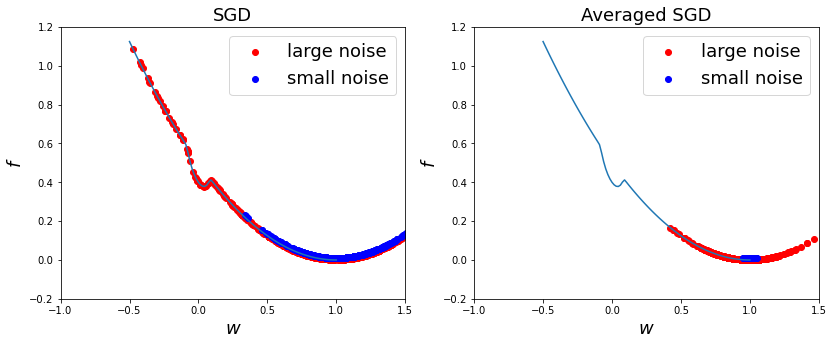

In [42]:
fig = plt.figure( figsize=(21,5) )
plt.rc('legend', fontsize=18)

#weights = 0.25 * np.ones_like(sgd_s_x)

ax = plt.subplot(1,3,1)
ax.set_xlabel("$w$", size=18)
ax.set_ylabel("$f$", size=18)

x = np.linspace(-0.5, 1, 100)
y = utils.f(x, config)

#plt.hist(sgd_s, range=(-5,5), bins=50, color='r', alpha=0.3, weights=weights)
#plt.hist(sgd_l, range=(-5,5), bins=50, color='b', alpha=0.3, weights=weights)
ax.scatter(sgd_s, utils.f(sgd_s, config), color='r', label='large noise')
ax.scatter(sgd_l, utils.f(sgd_l, config)+0.01, color='b', label='small noise')
ax.plot(x, y)
plt.title('SGD', size=18)
plt.xlim(-1,1.5)
plt.ylim(-0.2,1.2)
ax.legend(loc='upper right')

#-----
ax = plt.subplot(1,3,2)
ax.set_xlabel("$w$", size=18)
ax.set_ylabel("$f$", size=18)

x = np.linspace(-0.5, 1, 100)
y = utils.f(x, config)

#plt.hist(ave_sgd_s, range=(-5,5), bins=50, color='r', alpha=0.3, weights=weights)
#plt.hist(ave_sgd_l, range=(-5,5),  bins=50, color='b', alpha=0.3, weights=weights)
ax.scatter(ave_sgd_s, utils.f(ave_sgd_s, config), color='r', label='large noise')
ax.scatter(ave_sgd_l, utils.f(ave_sgd_l, config)+0.01, color='b', label='small noise')
ax.plot(x, y)
plt.title('Averaged SGD', size=18)
plt.xlim(-1,1.5)
plt.ylim(-0.2,1.2)
ax.legend(loc='upper right')


fig.show()
#fig.savefig('alg_comparison.png', bbox_inches='tight')